In [104]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings    # 경고메시지 제외
warnings.filterwarnings(action='ignore')

plt.rc('font', family='NanumGothic')
sns.set(font="NanumGothic",
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

df_busan = pd.read_csv('./data/데이터셋/날씨전처리완료결측치완료.csv')

In [105]:
df_busan.head()

,Unnamed: 0,date,year,hour,spend_time,original_time,서울기온(°C),서울강수량(mm),서울풍속(m/s),서울습도(%),...,서울지면온도(°C),부산기온(°C),부산강수량(mm),부산풍속(m/s),부산습도(%),부산이슬점온도(°C),부산일조(hr),부산일사(MJ/m2),부산시정(10m),부산지면온도(°C)
0,0,-3,2017,0,274.4,2017-10-01 00:00:00,18.4,0.0,1.3,83,...,15.1,18.6,0.0,1.1,60,10.6,0.0,0.0,2000,15.5
1,1,-3,2017,1,260.1,2017-10-01 01:00:00,18.0,0.0,1.6,81,...,15.2,18.1,0.0,2.1,44,5.6,0.0,0.0,2000,14.7
2,2,-3,2017,2,269.2,2017-10-01 02:00:00,17.9,0.0,1.8,81,...,15.5,17.8,0.0,1.3,56,8.8,0.0,0.0,2000,14.2
3,3,-3,2017,3,263.7,2017-10-01 03:00:00,17.7,0.0,1.8,80,...,15.2,17.4,0.0,0.7,51,7.1,0.0,0.0,2000,13.7
4,4,-3,2017,4,264.0,2017-10-01 04:00:00,17.5,0.0,1.3,79,...,15.4,16.8,0.0,0.9,54,7.4,0.0,0.0,1865,14.3


In [106]:
# 연속그래프를 위한 column 생성
df_busan.rename(columns={'Unnamed: 0':'idx'}, inplace=True)

<AxesSubplot:xlabel='original_time', ylabel='spend_time'>

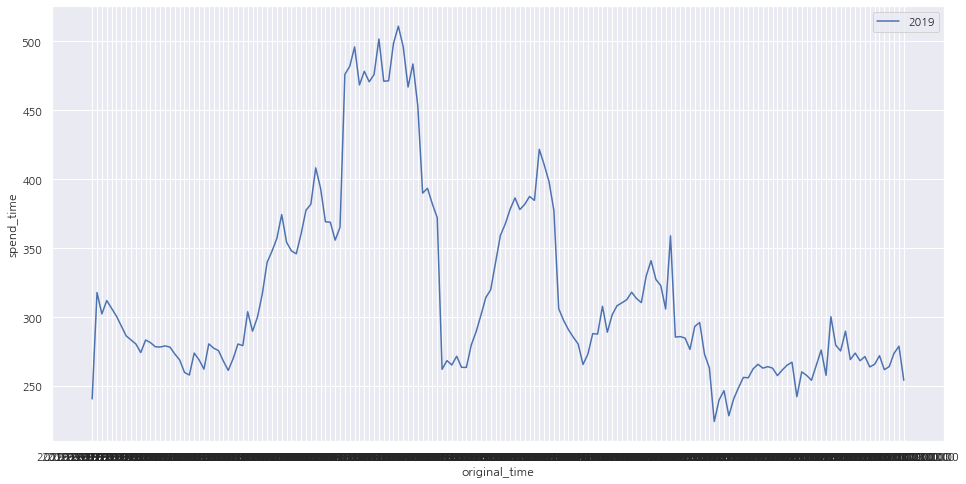

In [107]:
# 전처리한 2019년 확인
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1) 
sns.lineplot(x='original_time', y='spend_time',data=df_busan[df_busan['year']==2019], label='2019')

2019년 D, D+1 결측치는 나머지 연도의 평균을 삽입함.

<AxesSubplot:xlabel='idx', ylabel='spend_time'>

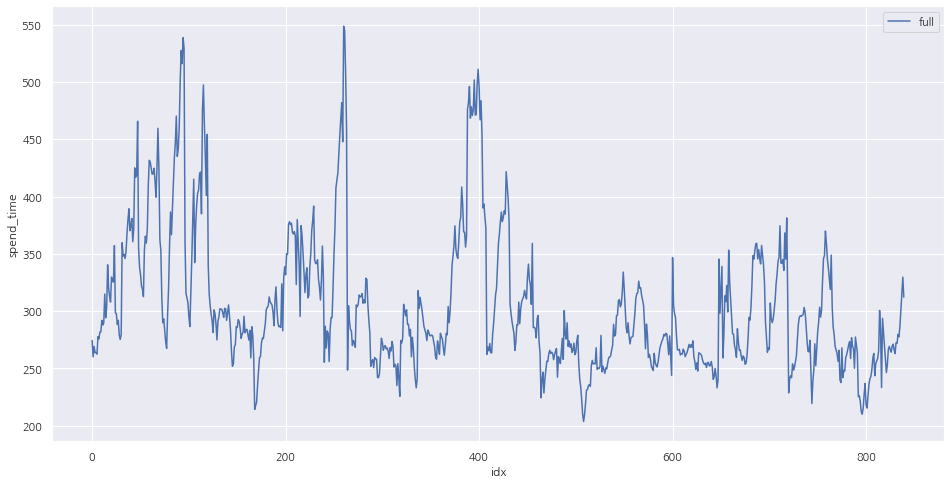

In [108]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1) 
sns.lineplot(x='idx', y='spend_time',data=df_busan, label='full')

전체적으로 봤을 때 코로나 발생 이후 귀성하는 사람이 감소해서 그런지 소요시간이 적게 걸리는 것을 볼 수 있다.  
또한 연휴가 길 때와 짧을 때 차이가 있을 것이라고 생각했다.  
또한 추석이 주말일 때도 고려해야 한다고 생각했다.  
그리고 무엇보다도 교통량에 따른 차이가 존재할 것이라고 생각했다.  
http://data.ex.co.kr/portal/fdwn/view?type=TCS&num=D8&requestfrom=dataset# 사용  


따라서 추가적으로 feature를 고려해야 할 것으로  
- 코로나 이전과 이후에 대한 범주형 feature 생성
- 추석주말일 경우와 아닐경우 범주형 feature 생성
- 교통량에 대한 feature 생성

In [109]:
plus_traffic_df = df_busan.copy()

In [110]:
traffic_2017_list = [73, 53, 75, 50, 34, 35, 12]
traffic_2018_list = [12, 10, 16, 24, 19, 9, 16]
traffic_2019_list = [39, 23, 26, 23, 11, 14, 21]
traffic_2020_list = [23, 14, 14, 11, 10, 15, 21]
traffic_2021_list = [23, 14, 14, 11, 10, 15, 21]
# 2021년은 결측치라 바로 앞의 관측치로 대체

#### 서울 - 부산 일평균 교통량

In [111]:
plus_traffic_df['traffic_mean'] = 0

In [112]:
idx = 0
for i in range(7):
  for j in range(24):
    plus_traffic_df['traffic_mean'].loc[idx + j] = traffic_2017_list[i]
  idx += 24

In [113]:
idx = 168
for i in range(7):
  for j in range(24):
    plus_traffic_df['traffic_mean'].loc[idx + j] = traffic_2018_list[i]
  idx += 24

In [114]:
idx = 336
for i in range(7):
  for j in range(24):
    plus_traffic_df['traffic_mean'].loc[idx + j] = traffic_2019_list[i]
  idx += 24

In [115]:
idx = 504
for i in range(7):
  for j in range(24):
    plus_traffic_df['traffic_mean'].loc[idx + j] = traffic_2020_list[i]
  idx += 24

In [116]:
idx = 672
for i in range(7):
  for j in range(24):
    plus_traffic_df['traffic_mean'].loc[idx + j] = traffic_2021_list[i]
  idx += 24

#### 해당날짜가 주말인가?

In [117]:
plus_traffic_df['is_weekend'] = 0

In [118]:
idx = 0 + 24
for i in range(6):
  for j in range(24):
    plus_traffic_df['is_weekend'].loc[idx + j] = 1
  idx += 24

In [119]:
idx = 168
for i in range(5):
  for j in range(24):
    plus_traffic_df['is_weekend'].loc[idx + j] = 1
  idx += 24

In [120]:
idx = 336 + 24
for i in range(4):
  for j in range(24):
    plus_traffic_df['is_weekend'].loc[idx + j] = 1
  idx += 24

In [121]:
idx = 504 + 24
for i in range(5):
  for j in range(24):
    plus_traffic_df['is_weekend'].loc[idx + j] = 1
  idx += 24

In [122]:
idx = 672
for i in range(4):
  for j in range(24):
    plus_traffic_df['is_weekend'].loc[idx + j] = 1
  idx += 24

#### 코로나 이전인가?

In [123]:
plus_traffic_df['spend_time'].isnull().sum()

0

In [128]:
plus_traffic_df['is_covid'] = 0

In [130]:
for i in range(336):
  plus_traffic_df['is_covid'].loc[504 + i] = 1

In [133]:
plus_traffic_df.to_csv('./final_dataset.csv')